In [ ]:
# Importing import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Stages of Project: 

1. Data Cleaning
2. EDA
3. Feature Engineering
4. Modelling
5. Website
6. Deployment

In [ ]:
# Reading the Dataset

In [2]:
df = pd.read_excel('train.xlsx')

In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [24]:
df.shape

(10682, 11)

In [25]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6066,Multiple carriers,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:00,13:20,6h 20m,1 stop,No info,9042
5204,Jet Airways,21/06/2019,Mumbai,Hyderabad,BOM → HYD,02:55,04:20,1h 25m,non-stop,In-flight meal not included,4995
4630,SpiceJet,3/06/2019,Banglore,Delhi,BLR → DEL,21:10,00:05 04 Jun,2h 55m,non-stop,No info,3311
2495,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,16:55,07:40 02 Mar,14h 45m,1 stop,1 Long layover,26890
4987,Jet Airways,1/05/2019,Banglore,Delhi,BLR → DEL,07:10,10:10,3h,non-stop,No info,7229


In [4]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [5]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
#drop null values

In [15]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [16]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [28]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [32]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [ ]:
# Extracting Day and month of the journey.

In [34]:
df['Journey_day'] = pd.to_datetime(df.Date_of_Journey,format ="%d/%m/%Y").dt.day
df['Journey_month']=pd.to_datetime(df.Date_of_Journey,format ="%d/%m/%Y").dt.month

In [35]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
5814,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,21:25,09:00 16 Mar,11h 35m,1 stop,No info,13555,18,3
7562,Multiple carriers,9/06/2019,Delhi,Cochin,DEL → BOM → COK,02:15,11:30,9h 15m,1 stop,No info,13587,9,6
6106,IndiGo,15/05/2019,Delhi,Cochin,DEL → HYD → COK,08:35,16:10,7h 35m,1 stop,No info,6442,15,5
9873,Multiple carriers,12/06/2019,Delhi,Cochin,DEL → BOM → COK,09:15,19:00,9h 45m,1 stop,No info,11622,12,6
5351,SpiceJet,21/05/2019,Delhi,Cochin,DEL → PNQ → COK,08:45,13:15,4h 30m,1 stop,No check-in baggage included,5158,21,5


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  Journey_day      10682 non-null  int64 
 12  Journey_month    10682 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [38]:
df.drop(['Date_of_Journey'],axis=1,inplace = True)

In [39]:
df.sample(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
6477,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,No info,14388,9,5
4159,Jet Airways,Delhi,Cochin,DEL → BOM → COK,13:00,18:50,5h 50m,1 stop,No info,17024,6,3


In [43]:
df['dep_hour'] = pd.to_datetime(df['Dep_Time'],format ="%H:%M").dt.hour

In [46]:
df['dep_min'] = pd.to_datetime(df['Dep_Time'],format ="%H:%M").dt.minute

In [47]:
df.sample(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min
10022,Jet Airways,Delhi,Cochin,DEL → BOM → COK,18:15,19:00 04 Jun,24h 45m,1 stop,No info,14714,3,6,18,15
6946,IndiGo,Kolkata,Banglore,CCU → BLR,04:40,07:15,2h 35m,non-stop,No info,4804,1,6,4,40


In [48]:
df.drop(['Dep_Time'],axis=1,inplace = True)

In [49]:
df.sample(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min
6813,Jet Airways,Kolkata,Banglore,CCU → DEL → BLR,21:05 02 May,24h 40m,1 stop,No info,12121,1,5,20,25
6085,Jet Airways,Delhi,Cochin,DEL → JAI → BOM → COK,18:50 22 Mar,37h 20m,2 stops,In-flight meal not included,9328,21,3,5,30


In [51]:
df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour

In [52]:
df['Arrival_minute'] = pd.to_datetime(df.Arrival_Time).dt.minute

In [53]:
df.sample(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,Arrival_hour,Arrival_minute
9508,IndiGo,Banglore,Delhi,BLR → DEL,22:50,2h 50m,non-stop,No info,4823,21,5,20,0,22,50
479,SpiceJet,Delhi,Cochin,DEL → MAA → COK,11:20,5h 15m,1 stop,No info,6297,21,5,6,5,11,20


In [54]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [60]:
df.sample(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,Arrival_hour,Arrival_minute
5278,SpiceJet,Chennai,Kolkata,MAA → CCU,2h 20m,non-stop,No info,3597,3,5,17,45,20,5
10384,Air India,Mumbai,Hyderabad,BOM → HYD,1h 15m,non-stop,No info,3625,12,5,19,30,20,45


C:\Users\SAMARTH\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

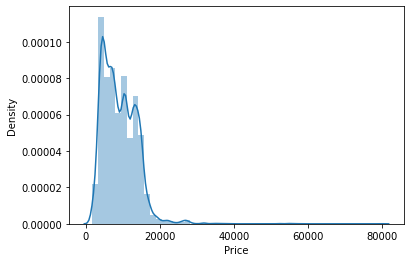

In [61]:
sns.distplot(df['Price'])

In [64]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'dep_hour',
       'dep_min', 'Arrival_hour', 'Arrival_minute'],
      dtype='object')

In [65]:
df['Duration_hour'] = abs(df['Arrival_hour']-df['dep_hour'])

In [ ]:
df['Duration_minutes'] = abs(df['Arrival_minute']-df['dep_min'])

In [66]:
df.sample(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,Arrival_hour,Arrival_minute,Duration_hour
3671,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,12h 15m,1 stop,In-flight meal not included,9663,6,5,20,0,8,15,12
6180,Air India,Kolkata,Banglore,CCU → JAI → BOM → BLR,10h 10m,2 stops,No info,10907,18,5,8,20,18,30,10


In [3]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [4]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [5]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 